# ***Decision Trees***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/"

## ***Decision Trees***

<center>

<img src="https://ichi.pro/assets/images/max/724/1*OLJWt9hD2zTS-x3gRhYuqg.png" witdh=20>

</center>

### ***Introducción***

El enfoque de clasificación y regresión vía árboles (CART) fue desarrollado por [Breiman et al. (1984)](https://en.wikipedia.org/wiki/Decision_tree_learning). Como su nombre indica, esta técnica de machine learning toma una serie de decisiones en forma de árbol. Los nodos intermedios (las ramas) representan soluciones y los nodos finales (las hojas) nos dan la predicción que buscamos.

Este algoritmo es principalmente usado en problemas de clasificación y por supuesto las variables pueden ser continuas o categóricas. Este algoritmo divide el espacio de predicitores (variables independientes) en regiones distintas y no sobrepuestas.

Este algoritmo es uno de los algoritmos de machine learning más populares. Utiliza una estructura similar a la de un árbol y sus posibles combinaciones para resolver un problema concreto. Este puede utilizarse tanto para la clasificación como para la regresión.

Un árbol de decisión es una estructura que incluye un ***nodo raíz, ramas y nodos hoja***. Cada nodo interno denota una prueba sobre un atributo, cada rama denota el resultado de una prueba y cada nodo hoja contiene una etiqueta de clase. El nodo superior del árbol es el nodo raíz.

El algoritmo del árbol de decisión se basa en algunas suposiciones:

1. Al principio, todo el set de train se considera la raíz.

2. Los valores de las características deben ser categóricos. Si los valores son continuos, se discretizan antes de construir el modelo.

3. Los registros se distribuyen recursivamente sobre la base de los valores de los atributos.

4. El orden de colocación de los atributos como raíz o nodo interno del árbol se realiza utilizando algún enfoque estadístico.

### ***Terminología importante.***

En un algoritmo de Árbol de Decisión, hay una estructura similar a un árbol en la que cada nodo interno representa una prueba sobre un atributo, cada rama representa el resultado de la prueba y cada nodo hoja representa una etiqueta de clase. Los caminos que van del nodo raíz al nodo hoja representan las reglas de clasificación.

Podemos ver que el algoritmo de árbol de decisión contiene cierta terminología. Los términos que intervienen en el algoritmo de árbol de decisión son los siguientes:


##### ***Nodo raíz:***

Representa toda la población o muestra. Esta se divide a su vez en dos o más conjuntos homogéneos.


##### ***División:***

Es un proceso de división de un nodo en dos o más subnodos.


##### ***Nodo de decisión***

Cuando un subnodo se divide en otros subnodos, se denomina nodo de decisión.


##### ***Nodo hoja/terminal***

Los nodos que no se dividen se denominan nodos Hoja o nodo terminal.


##### ***Poda***

Cuando eliminamos los subnodos de un nodo de decisión, este proceso se llama poda. Es el proceso contrario a la división.


##### ***Rama/Subárbol***

Una sub-sección de un árbol completo se llama rama o sub-árbol.


##### ***Nodo padre e hijo***

Un nodo dividido en subnodos se llama nodo padre de subnodos, donde los subnodos son los hijos de un nodo padre.

![Decision-Tree terminology](https://miro.medium.com/max/688/1*bcLAJfWN2GpVQNTVOCrrvw.png)

### ***Intuición del algoritmo del árbol de decisión***



La intuición del algoritmo del Árbol de Decisión es la siguiente:


1.	Para cada atributo del conjunto de datos, el algoritmo Decision-Tree forma un nodo. El atributo más importante se coloca en el nodo raíz. 

2.	Para evaluar la tarea en cuestión, empezamos en el nodo raíz y bajamos por el árbol siguiendo el nodo correspondiente que cumple nuestra condición o decisión.

3.	Este proceso continúa hasta llegar a un nodo hoja. Éste contiene la predicción o el resultado del Árbol de Decisión.


### ***Medidas de selección de atributos***

El reto principal en la implementación del Árbol de Decisión es identificar los atributos que consideramos como el nodo raíz y cada nivel. Este proceso se conoce como selección de atributos. Hay diferentes medidas de selección de atributos para identificar el atributo que puede ser considerado como el nodo raíz en cada nivel.


Hay dos medidas populares de selección de atributos.


- ***Ganancia de información.***
 
- ***Índice de Gini.***


Al utilizar la ganancia de información como criterio, asumimos que los atributos son categóricos y para el índice de Gini se asume que los atributos son continuos. Estas medidas de selección de atributos se describen a continuación.

### ***Ganancia de información***



Utilizando la ganancia de información como criterio, intentamos estimar la información que contiene cada atributo. Para entender el concepto de Ganancia de Información, necesitamos conocer otro concepto llamado **Entropía**. 

#### ***Entropía***

- La entropía mide la impureza del conjunto de datos. 

- En Física y Matemáticas, la entropía se refiere a la aleatoriedad o incertidumbre de una variable aleatoria X. 

- En la teoría de la información, se refiere a la impureza en un grupo de ejemplos. **La ganancia de información** es la disminución de la entropía. La ganancia de información calcula la diferencia entre la entropía antes de la división y la entropía media después de la división del conjunto de datos basado en los valores de los atributos dados. 



$$Entropy= \sum_{i=1}^{C}-p_{i}\log_2(p_i)$$

donde, **$C$** es el número de clases y **$p_i$** es la probabilidad asociada a la i-ésima clase. 



- Ejemplo 1: El nodo N tiene 10 ejemplos de clase $C_1$ y 30 ejemplos de clase $C_2$ la entropía pureza es:



In [2]:
-(10/40)*np.log2(10/40) - (30/40)*np.log2(30/40)

0.8112781244591328

- Ejemplo 2: El nodo N tiene 30 ejemplos de clase $C_1$ y 30 ejemplos de clase $C_2$ la entropía impureza es:

In [3]:
-(30/60)*np.log2(30/60) - (30/60)*np.log2(30/60)

1.0

-  Ejemplo 3: El nodo N tiene 1 ejemplos de clase $C_1$ y 29 ejemplos de clase $C_2$ la entropía pureza es:

In [4]:
-(1/30)*np.log2(1/60) - (30/60)*np.log2(30/60)

0.6968963531869506

###  ***Gini index***

Otra medida de selección de atributos que utiliza **CART (Árboles Categóricos y de Regresión)** es el **índice de Gini**. Este utiliza Gini para crear puntos de división. 

#### ***Gini index***

$$Gini=1-\sum_{i=1}^{C}(p_i)^2$$

Aquí, de nuevo **$C$** es el número de clases y **$p_i$** es la probabilidad asociada a la i-ésima clase.

- El índice de Gini dice que, si seleccionamos al azar dos elementos de una población, deben ser de la misma clase y la probabilidad de que esto ocurra es 1 si la población es pura. Esta funciona con la variable objetivo categórica "Éxito" o "Fracaso". Sólo realiza divisiones binarias. 

*Cuanto menor sea el valor de Gini, mayor será la homogeneidad.* CART (árbol de clasificación y regresión) utiliza el método de Gini para crear divisiones binarias.

Pasos para calcular Gini para una división

1.	Calcular Gini para los subnodos, utilizando la fórmula suma del cuadrado de las probabilidades de éxito y fracaso $(p^2+q^2)$.

2. Calcular el Gini de la división utilizando la puntuación de Gini ponderada de cada nodo de esa división.


- En el caso de un atributo de valor discreto, se selecciona como atributo de división el subconjunto que da el mínimo índice de Gini para ese elegido.

- En el caso de los atributos de valor continuo, la estrategia consiste en seleccionar cada par de valores adyacentes como posible punto de división y el punto con menor índice de Gini se elige como punto de división. El atributo con un índice de Gini mínimo se elige como atributo de división.

## ***Sobreajuste en el algoritmo del Árbol de Decisión***


El sobreajuste es un problema práctico cuando se construye un modelo de árbol de decisión.

- El problema del sobreajuste se considera cuando el algoritmo continúa profundizando cada vez más para reducir el error del set de train, pero el resultado es un aumento del error del set de test. Por lo tanto, la precisión de la predicción de nuestro modelo disminuye. Suele ocurrir cuando construimos muchas ramas debido a los valores atípicos y a las irregularidades de los datos.

Dos enfoques que pueden utilizarse para evitar el sobreajuste son los siguientes

#### ***Pre-Pruning***

En pre-pruning (pre-poda), detenemos la construcción del árbol un poco antes. Preferimos no dividir un nodo si su medida de bondad está por debajo de un valor umbral. Pero es difícil elegir un punto de parada adecuado.


#### ***Post-Pruning***

En la post-poda, profundizamos cada vez más en el árbol para construir un árbol completo. Si el árbol muestra el problema de sobreajuste, entonces la poda se realiza como un paso de post-pruning.

***Nota:*** Utilizamos los datos de cross-validation (próxima sesión) para comprobar el efecto de nuestra poda. Utilizando los datos de cross-validation, comprobamos si la expansión de un nodo mejora o no. Si muestra una mejora, entonces podemos continuar expandiendo ese nodo. Pero si muestra una reducción en la precisión, entonces no debe ser expandido. Por lo tanto, el nodo debe convertirse en un nodo hoja.

 Todo árbol con un factor de ramificación superior a dos se puede recomponer en un árbol binario equivalente.
 
 <div style="display: flex;">
  <img src="https://miro.medium.com/max/700/1*w11yHaFKRP86UQdcQgI1jQ.png" style="width: 50%; margin-right: 10px;">
  <img src="https://miro.medium.com/max/700/1*8Tzo_rPEa70zf_I8zJfpQA.png" style="width: 50%;">
</div>

## ***Ventajas.***

1. Los árboles son fáciles de interpretar aún cuando las relaciones entre predictores son complejas. Su estructura se asemejan a la forma intuitiva en que clasificamos y predecimos las personas, además, no se requieren conocimientos estadísticos para comprenderlos.

2. Los modelos basados en un solo árbol (no es el caso de bagging (random forest), boosting (XgBoost, CatBoost, Lgbm) se pueden representar gráficamente aún cuando el número de predictores es mayor de 3.


3. Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

4. Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico.

6. Si para alguna observación, el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.

7. Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables más importantes.

8. Son capaces de seleccionar predictores de forma automática.

## ***Desventajas.***

1. La capacidad predictiva de los modelos de regresión y clasificación basados en un único árbol es bastante inferior a la conseguida con otros modelos debido a su tendencia al overfitting. Sin embargo, existen técnicas más complejas que, haciendo uso de la combinación de múltiples árboles (bagging (random forest), boosting (XgBoost, CatBoost, LigthGBM), consiguen mejorar en gran medida este problema.

2. Cuando tratan con variables continuas, pierden parte de su información al categorizarlas en el momento de la división de los nodos. Por esta razón, suelen ser modelos que consiguen mejores resultados en clasificación que en regresión.

***Excelente video: https://www.youtube.com/watch?v=7VeUPuFGJHk&t=88s***

### ***Ejemplo 1 (muy sencillo).***

In [5]:
#  0 --> setosa, 1 --> versicolor , 2 ---> virginica
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris["species"] = iris.target
df_iris["species"] = df_iris["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Vamos a considerar solo el dataset con las features `petal length (cm)` y `petal width (cm)` para buscar realizar la clasificación.

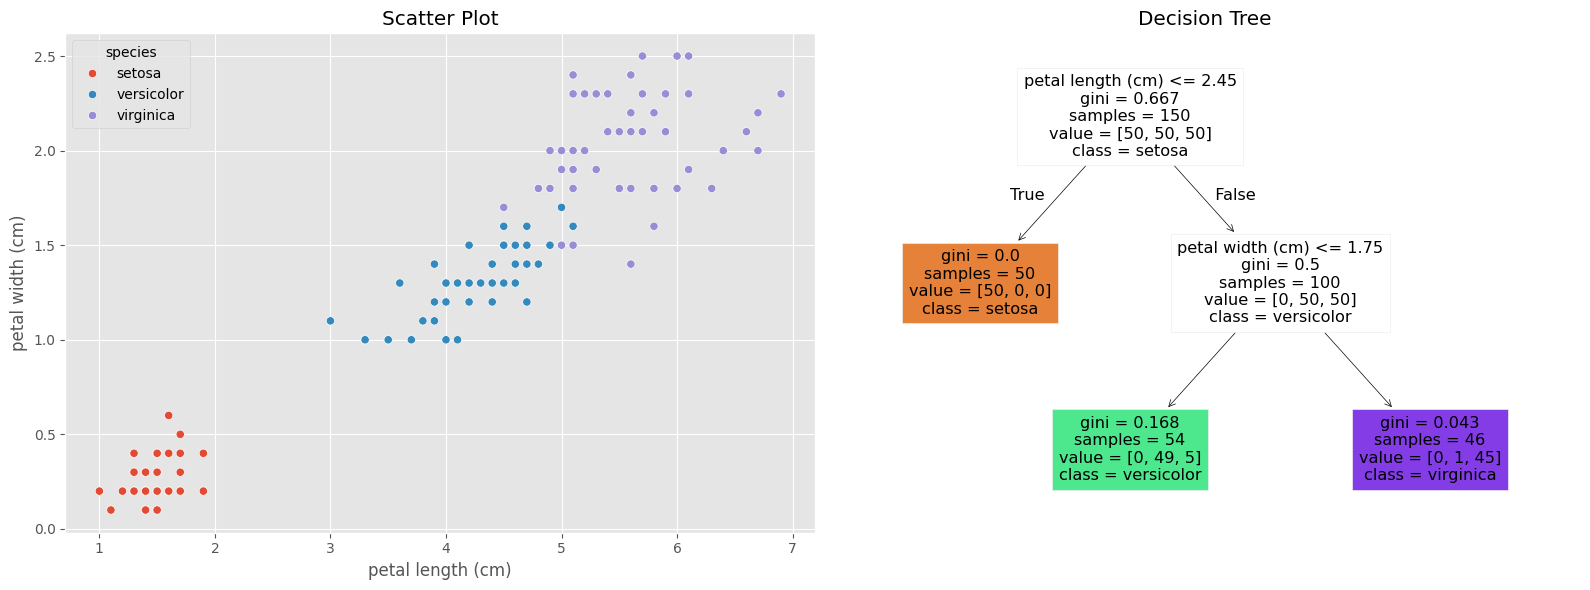

In [6]:
X1, y = df_iris[["petal length (cm)","petal width (cm)"]], df_iris["species"]
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=123)
tree_clf.fit(X1, y)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=df_iris, x="petal length (cm)", y="petal width (cm)", hue="species", ax=axes[0])
axes[0].set_title("Scatter Plot")

plot_tree(tree_clf, filled=True, feature_names=X1.columns, class_names=iris.target_names, ax=axes[1])
axes[1].set_title("Decision Tree")

plt.tight_layout()
plt.show()

En el **clasificador de árboles de decisión** los nodos en la parte inferior del árbol se denominan ***nodos hoja*** y todos los demás nodos se denominan nodos internos o ***nodos de rama***. Cada nodo contiene una cantidad específica de muestras que se indica mediante `samples=`, número de registros del set de train a los cuales se les aplica la regla. Entre estas muestras, la proporción de muestras que son `setosa`, `versicolor` y `virginica` se indica mediante `value=`, que es el número de registros del set de train de cada clase en el nodo. Los valores de resultado mayoritarios se indican mediante `class=` y `gini` que mide la impuereza del nodo.

Como un simple ejemplo consideremos el ***nodo izquierdo de profundidad 2.***. GINI será en este caso:

$$G_{\text{left\_depth\_2}}=1 – (0/54)^{2} – (49/54)^{2} – (5/54)^{2} ​​≈ 0,168$$

In [7]:
# Calculo de la probabilidad en cada clase
to_predict = pd.DataFrame({"petal length (cm)": [5], "petal width (cm)": [1.5]})
print("Instancia a predecir:")
display(to_predict)
print("Calculo de la probabilidad en cada clase:\n", tree_clf.predict_proba(to_predict))
# Predict tipo de Iris
print("\nPrediccion de la clase:\n", tree_clf.predict(to_predict))

Instancia a predecir:


,petal length (cm),petal width (cm)
0,5,1.5


Calculo de la probabilidad en cada clase:
 [[0.         0.90740741 0.09259259]]

Prediccion de la clase:
 ['versicolor']


In [8]:
# Calculo de la probabilidad en cada clase
to_predict = pd.DataFrame({"petal length (cm)": [5], "petal width (cm)": [2]})
print("Instancia a predecir:")
display(to_predict)
print("Calculo de la probabilidad en cada clase:\n", tree_clf.predict_proba(to_predict))
# Predict tipo de Iris
print("\nPrediccion de la clase:\n", tree_clf.predict(to_predict))

Instancia a predecir:


,petal length (cm),petal width (cm)
0,5,2


Calculo de la probabilidad en cada clase:
 [[0.         0.02173913 0.97826087]]

Prediccion de la clase:
 ['virginica']


Vamos a tomar todas la features y veamos que sucede.

In [9]:
# Preparamos la data.
X, y = df_iris.drop(columns=["species"]), df_iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

model = DecisionTreeClassifier(
    max_depth=3,        # Profundidad del árbol
    criterion="gini",   # Criterio para la función de costo.
    random_state=0      # Semilla aletoria.
)  

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,virginica,versicolor,setosa,virginica,setosa,virginica,setosa,versicolor,versicolor,versicolor,...,virginica,versicolor,setosa,setosa,versicolor,setosa,setosa,versicolor,versicolor,setosa


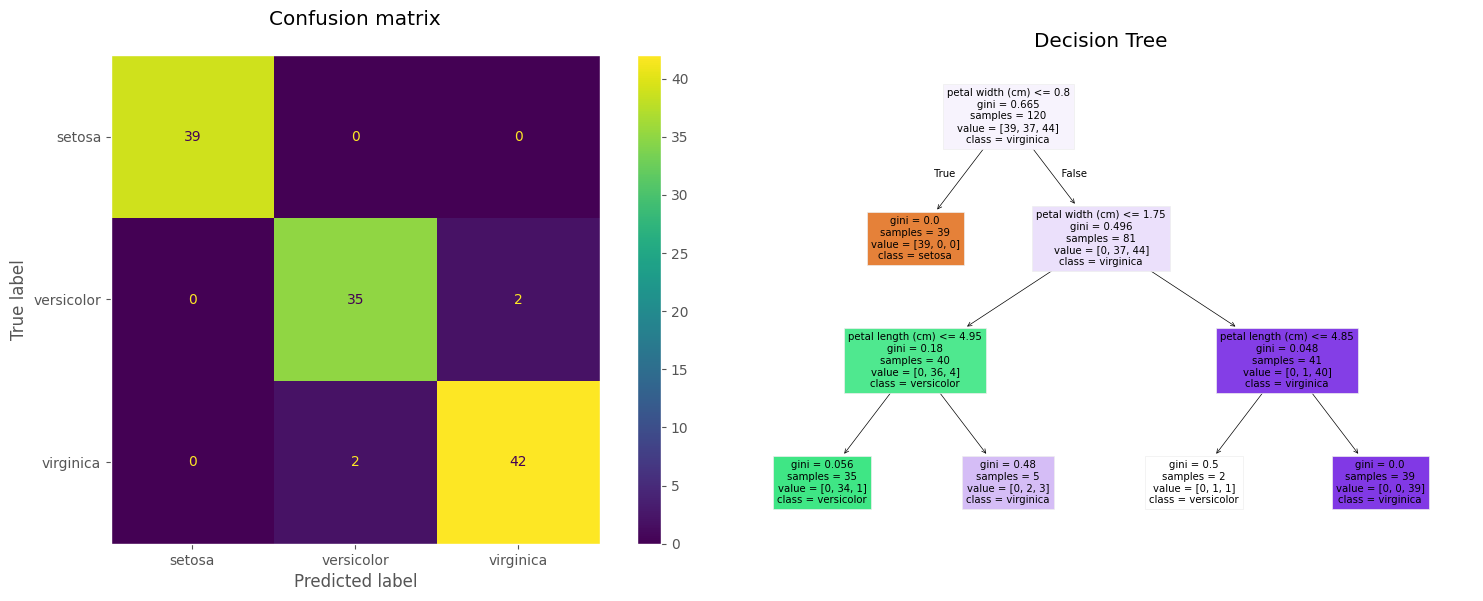

Accuracy en train es: 96.67 %
Accuracy en test es:  96.67 %


In [10]:
# Prediccion de las clases vía el modelo DecisionTree.
predict_class = model.predict(X_test)
display(pd.DataFrame(predict_class).T)

cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
disp.plot(ax=axes[0])
axes[0].set_title("Confusion matrix\n")
axes[0].grid(False)

plot_tree(model, feature_names=X_train.columns, filled=True, class_names=iris.target_names)
axes[1].set_title("Decision Tree")
plt.tight_layout()
plt.show()

accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy en train es: {100 * accuracy_train:.2f} %")
print(f"Accuracy en test es:  {100 * accuracy_test:.2f} %")

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,virginica,versicolor,setosa,virginica,setosa,virginica,setosa,versicolor,versicolor,versicolor,...,virginica,versicolor,setosa,setosa,versicolor,setosa,setosa,versicolor,versicolor,setosa


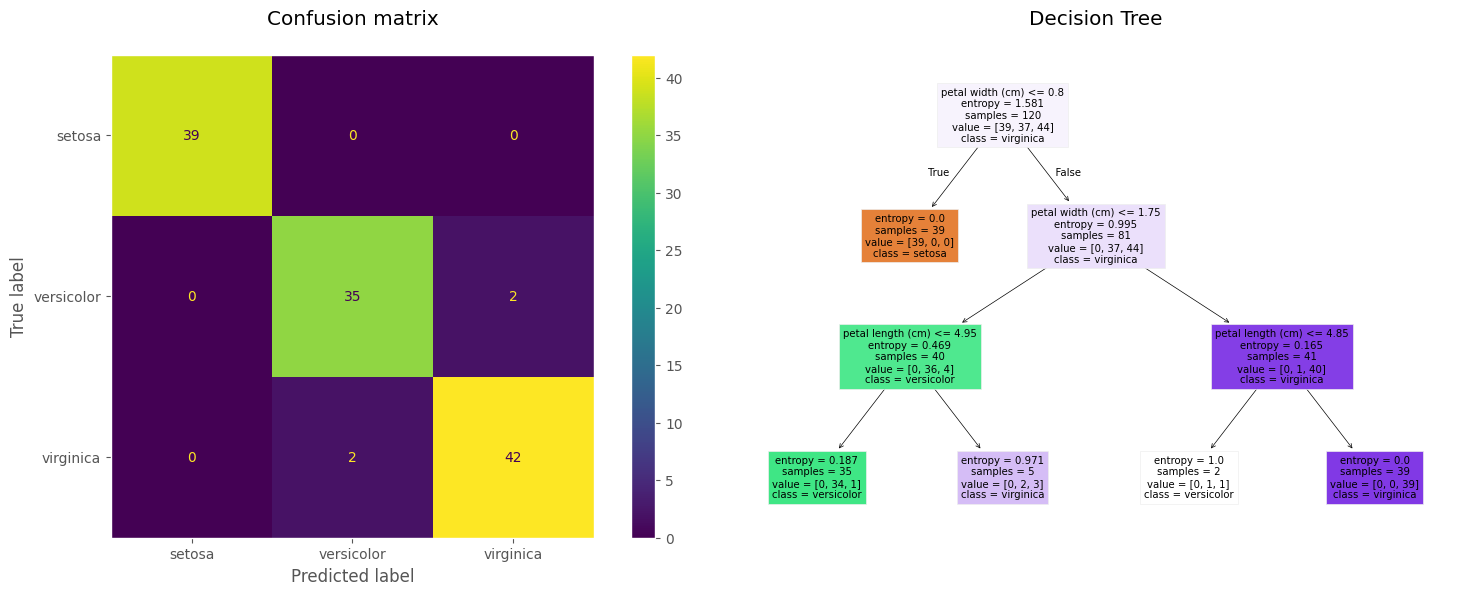

Accuracy en train es: 96.67%
Accuracy en test es:  96.67%


In [11]:
model1 = DecisionTreeClassifier(
    max_depth=3,            # Profundidad del árbol
    criterion="entropy",    # Criterio para la función de costo.
    random_state=0          # Semilla aletoria.
).fit(X_train, y_train) 

# Prediccion de las clases vía el modelo DecisionTree.
predict_class = model1.predict(X_test)
display(pd.DataFrame(predict_class).T)

cm = confusion_matrix(y_train, model1.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
disp.plot(ax=axes[0])
axes[0].set_title("Confusion matrix\n")
axes[0].grid(False)

plot_tree(model1, feature_names=X_train.columns, filled=True, class_names=iris.target_names)
axes[1].set_title("Decision Tree\n")
plt.tight_layout()
plt.show()

accuracy_train = accuracy_score(y_train, model1.predict(X_train))
accuracy_test = accuracy_score(y_test, model1.predict(X_test))
print(f"Accuracy en train es: {100 * accuracy_train:.2f}%")
print(f"Accuracy en test es:  {100 * accuracy_test:.2f}%")

## ***Ejemplo 2***

Ya hemos inspeccionado lo que podemos hacer para determinar si un aspecto de la información personal (por ejemplo, si la información de ingresos está verificada) es importante al predecir el estado de incumplimiento. Sin embargo, la pregunta más importante para todas las empresas de préstamos, si un usuario incumplirá o no.

***Problema:***  Construir un modelo de clasificación para determinar si un usuario pagará su préstamo o no.

1. Generar 1 modelo de referencia.

2. Generar un modelo vía árboles de decisión.

3. Observar que aún tenemos limitantes para la elección de nuestro modelo final.

## ***Árboles de decisión con más detalle***


Antes de continuar, revisemos los resultados y el código del modelo final de la lectura anterior.

In [12]:
df = pd.read_parquet(url_base + "Logistic_Regression_1.parquet")
df.head()

,estado_del_prestamo,ingreso_anual,estado_de_verificacion,anios_de_experiencia_laboral,tenencia_de_vivienda,tasa_de_interes,monto_del_prestamo,proposito,plazo,calificacion
0,completamente_pagado,24000.0,verificado,10+ años,alquiler,10.65%,5000,tarjeta_de_credito,36 meses,B
1,dado_de_baja,30000.0,verificado_con_fuente,< 1 año,alquiler,15.27%,2500,auto,60 meses,C
2,completamente_pagado,12252.0,no_verificado,10+ años,alquiler,15.96%,2400,pequeno_negocio,36 meses,C
3,completamente_pagado,49200.0,verificado_con_fuente,10+ años,alquiler,13.49%,10000,otro,36 meses,C
4,completamente_pagado,80000.0,verificado_con_fuente,1 año,alquiler,12.69%,3000,otro,60 meses,B


In [13]:
df_dt = df.copy()
df_dt = pd.read_parquet(url_base + "Logistic_Regression_1.parquet",)
df_dt["tasa_de_interes"] = df_dt["tasa_de_interes"].str.replace("%", "").astype("float")
df_dt

,estado_del_prestamo,ingreso_anual,estado_de_verificacion,anios_de_experiencia_laboral,tenencia_de_vivienda,tasa_de_interes,monto_del_prestamo,proposito,plazo,calificacion
0,completamente_pagado,24000.0,verificado,10+ años,alquiler,10.65,5000,tarjeta_de_credito,36 meses,B
1,dado_de_baja,30000.0,verificado_con_fuente,< 1 año,alquiler,15.27,2500,auto,60 meses,C
2,completamente_pagado,12252.0,no_verificado,10+ años,alquiler,15.96,2400,pequeno_negocio,36 meses,C
3,completamente_pagado,49200.0,verificado_con_fuente,10+ años,alquiler,13.49,10000,otro,36 meses,C
4,completamente_pagado,80000.0,verificado_con_fuente,1 año,alquiler,12.69,3000,otro,60 meses,B
...,...,...,...,...,...,...,...,...,...,...
38700,completamente_pagado,110000.0,no_verificado,4 años,hipoteca,8.07,2500,remodelacion_del_hogar,36 meses,A
38701,completamente_pagado,18000.0,no_verificado,3 años,alquiler,10.28,8500,tarjeta_de_credito,36 meses,C
38702,completamente_pagado,100000.0,no_verificado,< 1 año,hipoteca,8.07,5000,consolidacion_de_deudas,36 meses,A
38703,completamente_pagado,200000.0,no_verificado,< 1 año,hipoteca,7.43,5000,otro,36 meses,A


Que sucede con un par de solicitantes si tienen como `monto_del_prestamo` igual a 10,000 y 100,000,000 respectivamente?

Predict para 10,000 en monto del prestamo:      1 (completamente_pagado)
Predict para 10,000,0000 en monto del prestamo: 1 (completamente_pagado)


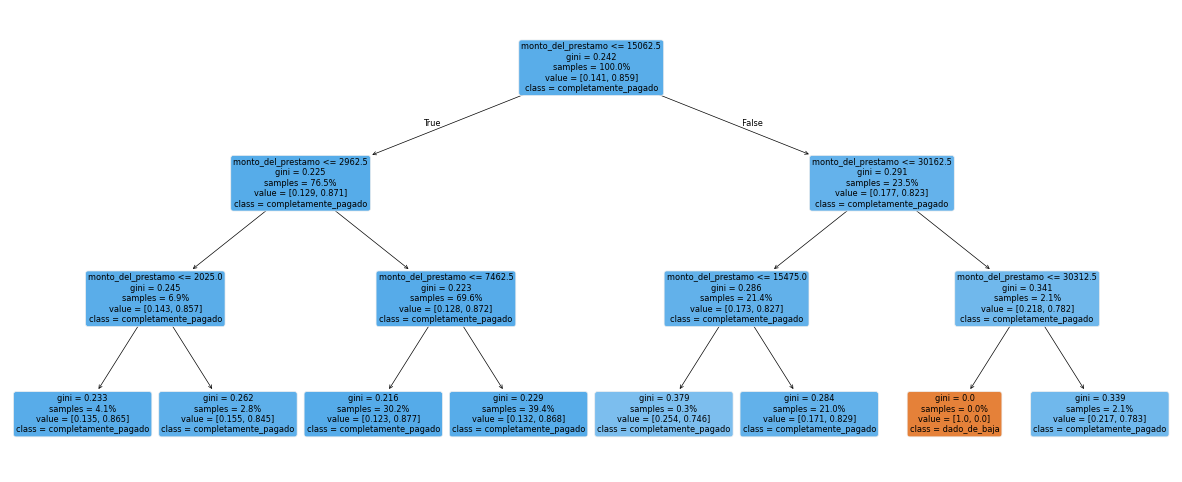

In [14]:
# Que sucede con un par de solicitantes si tienen como `monto_del_prestamo` igual a 10,000 y 100,000,000 respectivamente?
clf = DecisionTreeClassifier(max_depth=3, criterion="gini")
y_temp = label_binarize(df_dt["estado_del_prestamo"], classes=["dado_de_baja", "completamente_pagado"])
clf.fit(df_dt[["monto_del_prestamo"]], y_temp)

_ = plot_tree(
    clf, feature_names=["monto_del_prestamo"], filled=True, rounded=True,
    class_names=["dado_de_baja", "completamente_pagado"], proportion=True
)
print(f"Predict para 10,000 en monto del prestamo:      {clf.predict([[10000]])[0]} (completamente_pagado)")
print(f"Predict para 10,000,0000 en monto del prestamo: {clf.predict([[100_000_000]])[0]} (completamente_pagado)")

### ***Funcionamiento del algoritmo en variables categoricas.***

Vamos a suponer que queremos crear un árbol de decisión que prediga `estado_del_prestamo` basado en `plazo` y `estado_de_verificacion`. Lo primero que debemos hacer es decidir qué nodo poner en la parte superior del árbol. Podemos hacer esto simplemente inspeccionando cuál `plazo` y `estado_de_verificacion` hace un mejor trabajo al predecir `estado_del_prestamo`.

Como ejemplo, imaginemos que el nodo superior en el árbol es `plazo_36 meses` (es decir, si el cliente solicitó un préstamo con un plazo de `36 meses`). Idealmente, este sería un clasificador perfecto si todos los clientes que solicitaron un préstamo con un plazo de `36 meses` pagaron completamente su deuda y todos los clientes que no solicitaron un préstamo con un plazo de `36 meses` (ed, solicitaron a `60 meses`) incumplieron.

#### ***Ejemplo 3.***

Calcule la ***impureza de Gini*** y el valor de CART para `plazo de 36 meses` y `estado de verificacion verificado`.

In [15]:
def get_ct(df, col):
    """
    Genera una tabla cruzada con porcentajes para un análisis descriptivo.

    Esta función calcula una tabla cruzada que muestra la distribución de una columna específica en relación 
    al estado de los préstamos, incluyendo un cálculo adicional del porcentaje de préstamos "completamente pagado" 
    sobre el total de cada categoría de la columna seleccionada.
    """
    ct_res = pd.crosstab(col, df["estado_del_prestamo"], margins=True, margins_name="Total")
    ct_res["completamente_pagado (%)"] = ct_res["completamente_pagado"]/ct_res["Total"]
    
    return ct_res

Podemos hacer uso del siguiente par de tablas cruzadas:

In [16]:
get_ct(df_dt, df_dt["plazo"] == " 36 meses")

estado_del_prestamo,completamente_pagado,dado_de_baja,Total,completamente_pagado (%)
plazo,,,,
False,8054,2367,10421,0.772862
True,25211,3073,28284,0.891352
Total,33265,5440,38705,0.859450


Notemos que de todos los clientes que solicitaron un préstamo a plazo de `36 meses`, el $89,1\%$ tienen `completamente_pagado`. Debido a que **no** todos los clientes eran `dado_de_bajo` o `completamente_pagado`, decimos que este conjunto es ***impuro***. Por ejemplo, el conjunto de clientes que pidieron un préstamo a `60 meses` también es impuro ya que solo el $77.2\%$ de estos estan en `completamente_pagado`. En lugar de encontrar una regla perfecta que aísle un conjunto puro, el objetivo principal del algoritmo es seleccionar una regla que minimice la impureza general de los conjuntos resultantes.

La **impureza de Gini** en cada nodo para el caso de `plazo=36 meses` es:

$$
\begin{equation*}
\begin{aligned}
\text{Gini}(\text{plazo = 36 meses} )=1 - [(0.891352)^{2} + (1-0.891352)^{2})]\approx 0.193\\
\text{Gini}(\text{plazo != 36 meses})=1 - [(0.772862)^{2} + (1-0.772862)^{2})]\approx 0.351\\
\end{aligned}
\end{equation*}
$$ 

Luego, la impureza general es:

$$
\text{CART(plazo = 36 meses)}=\frac{28284}{38705}*0.193 + \frac{10421}{38705}*0.351\approx 0.23606

In [17]:
get_ct(df_dt, df_dt["estado_de_verificacion"] == "verificado")

estado_del_prestamo,completamente_pagado,dado_de_baja,Total,completamente_pagado (%)
estado_de_verificacion,,,,
False,22855,3463,26318,0.868417
True,10410,1977,12387,0.840397
Total,33265,5440,38705,0.859450


La **impureza de Gini** en cada nodo para el caso de `estado_de_verificacion=verificado` es:

$$
\begin{equation*}
\begin{aligned}
\text{Gini}(\text{estado de verificacion=verificado})=1 - [(0.840397)^{2} + (1-0.840397)^{2})]\approx 0.2682\\
\text{Gini}(\text{estado de verificacion !=verificado})=1 - [(0.868417)^{2} + (1-0.868417)^{2})]\approx 0.2285\\
\end{aligned}
\end{equation*}
$$ 

Luego, la impureza general es:

$$
\text{CART(estado de verificacion=verificado)}=\frac{12387}{38705}*0.2682 + \frac{26318}{38705}*0.2285\approx 0.241217

Por lo tanto, la decisión que da el puntaje de impureza más bajo es `plazo=36 meses` y este es el nodo desde el cual comenzamos nuestro árbol de decisión. Finalmente, repetimos este procedimiento con los subconjuntos subsiguientes determinados por la decisión `plazo=36 meses` hasta que se haya alcanzado la profundidad deseada o todos los conjuntos subsiguientes tengan cero impurezas. Verifiquemos nuestros hallazgos usando el clasificador de árbol de decisión de `sklearn`:

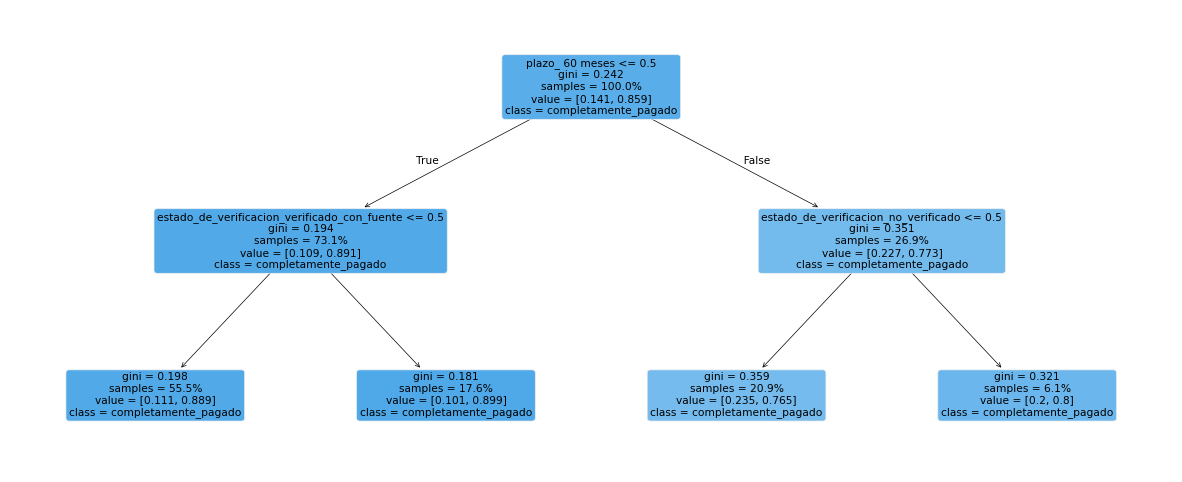

In [18]:
covariates = ["plazo", "estado_de_verificacion"]
preprocessor = ColumnTransformer(
     [("onehot", OneHotEncoder(), covariates)],
     remainder="passthrough"
)

clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf2.fit(preprocessor.fit_transform(df_dt[covariates]), y_temp)

_ = plot_tree(
    clf2, feature_names=preprocessor["onehot"].get_feature_names_out(), filled=True, rounded=True,
    class_names=["dado_de_baja", "completamente_pagado"], proportion=True
)

Podemos ver que el enfoque del árbol de decisiones no supone ninguna suposición sobre la relación entre el resultado y las covariables. Por lo tanto, es un algoritmo muy flexible que puede capturar una amplia gama de relaciones subyacentes entre el resultado y las covariables. Sin embargo, este algoritmo tiene muchos inconvenientes:

1. Debido a que es tan flexible, tiende a sobreajustarse. Cuando se aplica a un conjunto de `test` independiente, el rendimiento suele disminuir significativamente. Este inconveniente realmente limita la aplicación de árboles de decisión.
2. Es difícil entrenar cuando el número de covariables es grande. En cada nodo interno, debe escanear una larga lista de posibles variables de división, lo que hace que el algoritmo sea complicado desde el punto de vista computacional. Sin embargo, este problema se ha mitigado con la potencia informática moderna.
3. Los árboles de decisión entrenados en el mismo conjunto de datos no siempre son los mismos. Este problema de inestabilidad ocurre porque es posible que el algoritmo no explore las covariables en el mismo orden cada vez. Como resultado, el árbol final puede variar mucho de una ejecución a otra.

#### ***Ejemplo 4:***

Usando `train_test_split` del paquete `sklearn`, seleccione aleatoriamente el 75 % de la muestra en nuestro conjunto de datos y entrene un árbol de decisión en estas muestras con la covariable `ingreso_anual`. Evalúe la precisión del árbol en el conjunto de `test` y las muestras que no están incluidas en este conjunto. ¿Ve un cambio significativo en la puntuación de precisión?

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_dt[['ingreso_anual']], y_temp, test_size=0.25, random_state=1)
##
clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(X_train, y_train)
##
y_pred_train = clf3.predict(X_train)
y_pred_test = clf3.predict(X_test)
##
print(f"Accuracy en Train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy en Test:  {accuracy_score(y_test, y_pred_test)}")

Accuracy en Train: 0.875844012677415
Accuracy en Test:  0.8391030277978713


Podemos ver que la precisión cae 0.4 en las muestras de test. Esto parece indicar que el problema de sobreajuste de nuestro árbol de decisión particular no es demasiado grave. Debemos tener en cuenta que la prevalencia de `completamente_pagado` en el conjunto de datos es mucho mayor que `dados_de_baja`. Esto podría inflar la precisión de un clasificador pues si el clasificador que etiqueta a todos como `completamente_pagado`,  Este clasificador tendría razón la gran mayoría de las veces, pero difícilmente lo consideraríamos un clasificador adecuado.

### Límite de decisión de un árbol de decisión

El límite de decisión del árbol de decisión puede ser altamente no lineal. Por lo general, parece parches debido al hecho de que estamos dicotomizando el conjunto de datos en múltiples niveles. El siguiente es un ejemplo de un árbol construido con `ingreso_anual` y `monto_del_prestamo`:

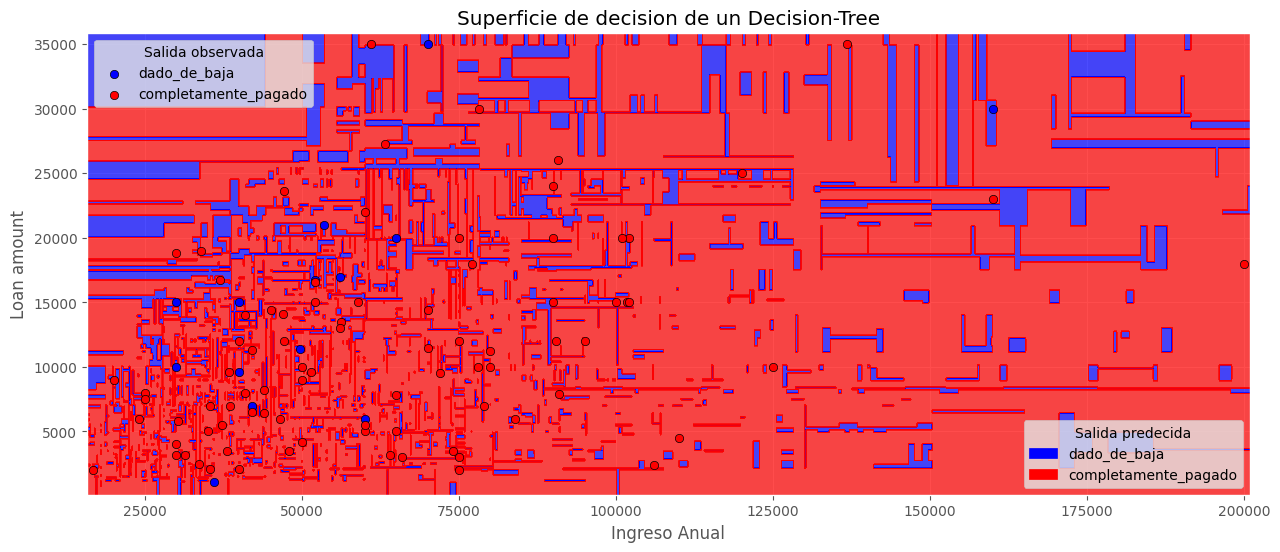

In [20]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Tomado de https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
n_classes = 2   
plot_colors = "br"
labels = ["dado_de_baja", "completamente_pagado"]  
clf = DecisionTreeClassifier().fit(df_dt[["ingreso_anual", "monto_del_prestamo"]], y_temp)
# Plot the decision boundary
plot_step = 100
viridis = cm.get_cmap("viridis", 2)
newcolors = viridis(np.linspace(0, 1, 2))
blue = np.array([0, 0, 1, 1])
red = np.array([1, 0, 0, 1])
newcolors[0, :] = blue
newcolors[1, :] = red
newcmp = ListedColormap(newcolors)

np.random.seed(0)
idx_plot = np.random.choice(df_dt.shape[0], 100, replace = False )
df_dt_plot = df_dt.iloc[idx_plot]

x_min, x_max = df_dt_plot["ingreso_anual"].min() - 1000, df_dt_plot["ingreso_anual"].max() + 1000
y_min, y_max = df_dt_plot["monto_del_prestamo"].min() - 1000, df_dt_plot["monto_del_prestamo"].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))

fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=newcmp, alpha = 0.7)

plt.xlabel("Ingreso Anual")
plt.ylabel("Loan amount")
plt.axis("tight");

for i, color in zip(range(n_classes), plot_colors):
    idx = df_dt_plot.index[df_dt_plot.index.isin(np.where(y_temp == i)[0])]
    plt.scatter(df_dt_plot.loc[idx, "ingreso_anual"], df_dt_plot.loc[idx, "monto_del_prestamo"], 
                c=color, label=labels[i], edgecolors="black")

legend_elements = [Patch(facecolor="blue", edgecolor="blue", label="dado_de_baja"),
Patch(facecolor="red", edgecolor="red", label="completamente_pagado")]

plt.axis("tight")
plt.title("Superficie de decision de un Decision-Tree")
leg1 = ax.legend(loc="upper left", title="Salida observada")
ax.legend(handles=legend_elements, loc="lower right", title="Salida predecida");
ax.add_artist(leg1);

## ***Comparando los 2 modelos en el mismo Train y Test.***

In [21]:
# Cargamos el DataSet
df_prestamos = pd.read_parquet(url_base + "Logistic_Regression_1.parquet")
df_prestamos["tasa_de_interes"] = df_prestamos["tasa_de_interes"].str.replace("%", "").astype("float")
df_prestamos.drop(columns=["estado_de_verificacion"], inplace=True)
df_prestamos

X, y = pd.get_dummies(df_prestamos.drop(columns=["estado_del_prestamo"]), drop_first=True), df_prestamos["estado_del_prestamo"]
y = label_binarize(y, classes=["dado_de_baja", "completamente_pagado"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2, stratify=y)

### ***Logistic regression.***

In [22]:
clf_lr = LogisticRegression(C=1e10, solver="newton-cg", random_state=123)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=10000000000.0, random_state=123, solver='newton-cg')

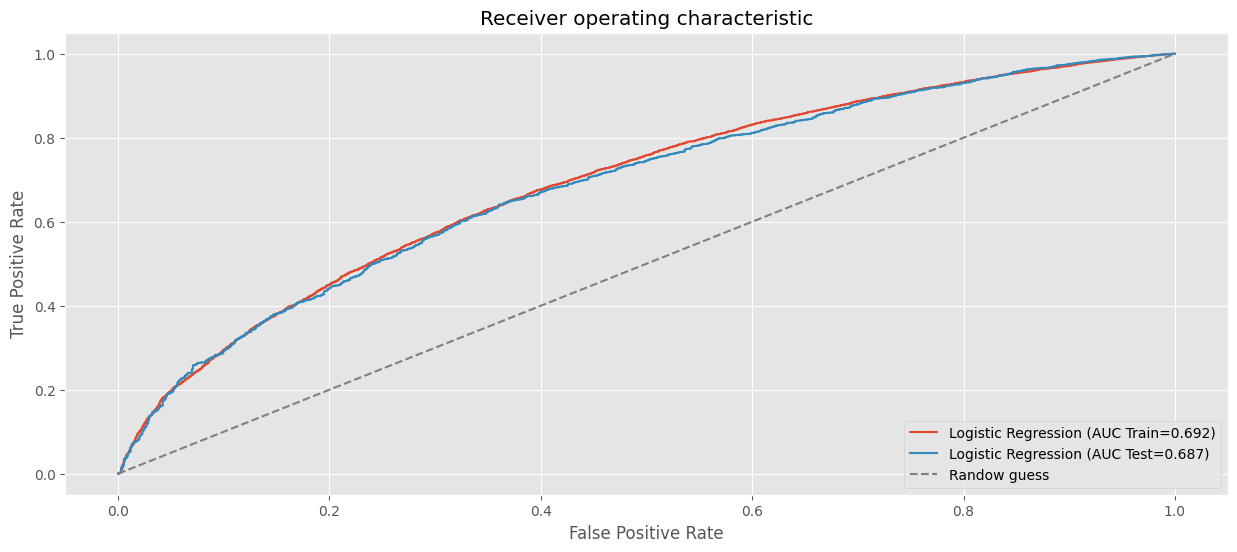

In [23]:
# Curva ROC modelo Logistic Regression.
# AUC en train.
fpr, tpr, _ = roc_curve(y_train, clf_lr.predict_proba(X_train)[:, 1])
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC Train={roc_auc:.3f})")

# AUC en test.
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC Test={roc_auc:.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.plot((0,1), (0,1), ls="--", color="grey", label="Randow guess")
plt.legend(loc="lower right")
plt.show()

### ***Decision Tree.***

In [24]:
# Preprocesamiento
X_tree, y = df_prestamos.drop(columns=["estado_del_prestamo"]), df_prestamos["estado_del_prestamo"]
cols_no_numeric = X_tree.select_dtypes(exclude=np.number).columns

preprocessor = ColumnTransformer(
     [("onehot", OneHotEncoder(), cols_no_numeric)],
     remainder="passthrough"
)

X_tree = preprocessor.fit_transform(X_tree)
y = label_binarize(y, classes=["dado_de_baja", "completamente_pagado"])

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, random_state=123, test_size=0.2, stratify=y)

In [25]:
depth = 5
clf_tree = DecisionTreeClassifier(
    max_depth=depth,
    criterion="gini",
    random_state=123
)

clf_tree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=5, random_state=123)

***¿Que sucede con la curva ROC, si cambiamos la profundidad del árbol?***

In [26]:
depth = 10
clf_tree_ = DecisionTreeClassifier(
    max_depth=depth,
    criterion="gini",
    random_state=123
)

clf_tree_.fit(X_train_tree, y_train_tree)

fpr, tpr, _ = roc_curve(y_train_tree, clf_tree_.predict_proba(X_train_tree)[:, 1])
print(f"DecisionTree, AUC en Train={auc(fpr, tpr):.4f}")
fpr, tpr, _ = roc_curve(y_test_tree, clf_tree_.predict_proba(X_test_tree)[:, 1])
print(f"DecisionTree, AUC en Test={auc(fpr, tpr):.4f}")

DecisionTree, AUC en Train=0.7536
DecisionTree, AUC en Test=0.6467


### ***Plot curvas de ROC en Train y Test***

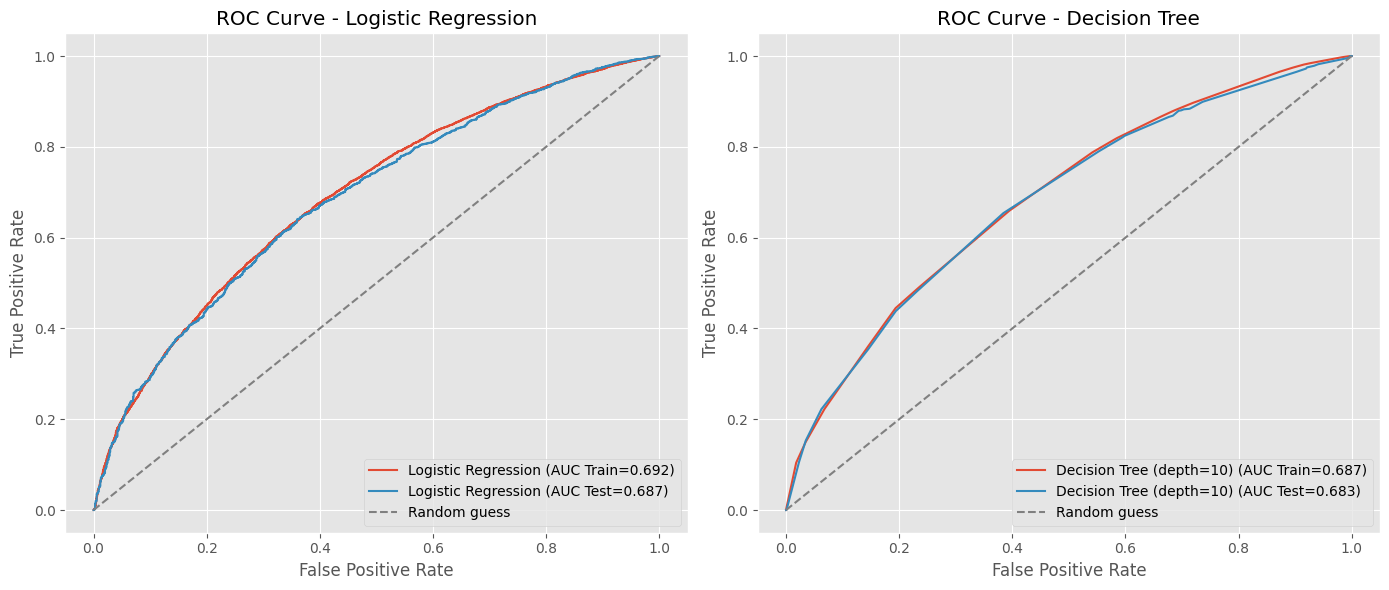

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Curva ROC para el modelo Logistic Regression
# AUC en train.
fpr, tpr, _ = roc_curve(y_train, clf_lr.predict_proba(X_train)[:, 1])
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, label=f"Logistic Regression (AUC Train={roc_auc:.3f})")

# AUC en test.
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, label=f"Logistic Regression (AUC Test={roc_auc:.3f})")

axes[0].plot((0, 1), (0, 1), ls="--", color="grey", label="Random guess")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Logistic Regression")
axes[0].legend(loc="lower right")

# Curva ROC para el modelo DecisionTree
# AUC en train.
fpr, tpr, _ = roc_curve(y_train_tree, clf_tree.predict_proba(X_train_tree)[:, 1])
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"Decision Tree (depth={depth}) (AUC Train={roc_auc:.3f})")

# AUC en test.
fpr, tpr, _ = roc_curve(y_test_tree, clf_tree.predict_proba(X_test_tree)[:, 1])
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"Decision Tree (depth={depth}) (AUC Test={roc_auc:.3f})")

axes[1].plot((0, 1), (0, 1), ls="--", color="grey", label="Random guess")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Decision Tree")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

### ***Referencias***

1. _R. E. Chapman, Degradation Study of a Photographic Developer to Determine Shelf Life, Quality Engineering 10 (1997), pp. 137 – 140._`